In [1]:
# import libraries 

import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam 

from tensorflow.keras.models import Model, load_model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# loading dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
train_images[0].shape

(28, 28)

In [6]:
train_labels[0]

9

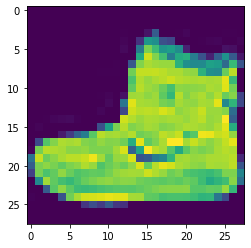

In [7]:
plt.imshow(train_images[0])

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [9]:
train_images.dtype

dtype('uint8')

In [10]:
# normalization 
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)

test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)


In [11]:
# one-hot-encoding
train_labels_ohe = to_categorical(train_labels)
test_labels_ohe = to_categorical(test_labels)

In [12]:
train_labels_ohe[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [22]:
# CNN - Modeling
tf.keras.backend.clear_session()

input_tensor = Input(shape=(28,28,1))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same',activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same',activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1254500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [23]:
# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
# model save
checkpoint_cb = ModelCheckpoint("fashion_model_211017.h5", save_best_only=True, verbose=1 )

In [25]:
# early-stopping 
early_stopping_cb = EarlyStopping(monitor='val_loss',patience=30,restore_best_weights=True )

In [27]:
# ReduceLROnPlateau란? 
# => earlyStopping 콜백과 같이 patience 인자를 지정하되, 지정된 기간동안 
# 평가지표에서 성능향상이 일어나지 않으면 학습률을 조정하는 콜백 
# ReduceLROnPlateau = (monitor='val_loss',factor=0.1, patience=10, verbose=0, min_lr=0)
# factor => 학습률 조정에 사용되는 값(새로운 학습률= factor* 기존학습률)
# patience => 지정한 수 만큼의 기간에서 성능 향상이 일어나지 않는 경우 학습률을 조정
# min_lr => 학습률의 하한을 지정한다 => 1e-5 로 지정할 경우 이보다 낮은 학습률로 조정하지 않는다 
# 일반적으로 factor=0.1, 0.2
# min_lr = 1e-6, 1e-7

reducelr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1)

In [28]:
# 모델 학습 
history = model.fit(x=train_images, y=train_labels_ohe, validation_split=0.2, batch_size=64, epochs=50, verbose=1,
             callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

Epoch 1/50
750/750 [==============================] - ETA: 0s - loss: 0.3985 - accuracy: 0.8584
Epoch 00001: val_loss improved from inf to 0.28137, saving model to fashion_model_211017.h5
750/750 [==============================] - 70s 94ms/step - loss: 0.3985 - accuracy: 0.8584 - val_loss: 0.2814 - val_accuracy: 0.8972
Epoch 2/50
750/750 [==============================] - ETA: 0s - loss: 0.2404 - accuracy: 0.9126
Epoch 00002: val_loss improved from 0.28137 to 0.25814, saving model to fashion_model_211017.h5
750/750 [==============================] - 71s 95ms/step - loss: 0.2404 - accuracy: 0.9126 - val_loss: 0.2581 - val_accuracy: 0.9082
Epoch 3/50
750/750 [==============================] - ETA: 0s - loss: 0.1869 - accuracy: 0.9325
Epoch 00003: val_loss improved from 0.25814 to 0.24232, saving model to fashion_model_211017.h5
750/750 [==============================] - 78s 104ms/step - loss: 0.1869 - accuracy: 0.9325 - val_loss: 0.2423 - val_accuracy: 0.9137
Epoch 4/50
750/750 [========

KeyboardInterrupt: 